In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
Data=pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")
Data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
df=Data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df["City"].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [8]:
# Removing the Outliers from Bathroom column value 10 bathroom
df=df[df['Bathroom'] != 10]
df['Bathroom'].value_counts()

Bathroom
2    2291
1    1474
3     749
4     156
5      60
6      12
7       3
Name: count, dtype: int64

In [9]:
# Removing the Outliers from Rent column values like 34lakh ,12 lakh ,10lakh etc
df=df[df['Rent'] != 850000]

In [10]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4744.000000,4.744000e+03,4744.000000,4744.000000
mean,2.083685,3.478687e+04,965.537732,1.963744
std,0.831817,7.718391e+04,625.220243,0.876493
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,7000.000000,7.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Rent', ylabel='Point of Contact'>

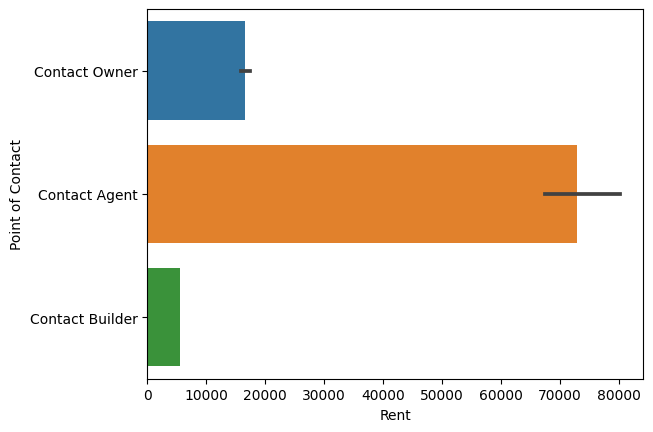

In [12]:
sns.barplot(data=df , x='Rent' , y='Point of Contact')

<Axes: xlabel='count', ylabel='City'>

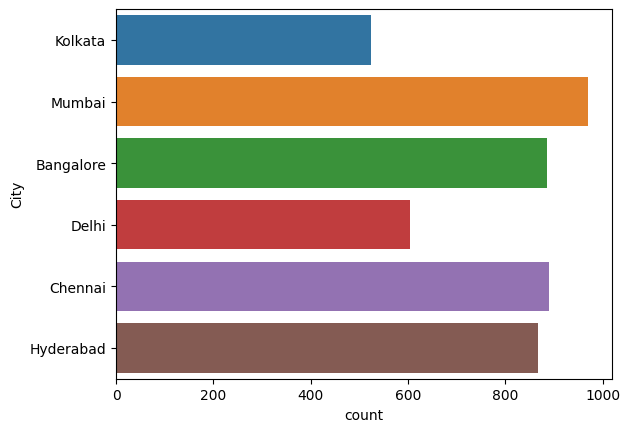

In [13]:
sns.countplot(data=df , y='City')

<Axes: xlabel='Rent', ylabel='City'>

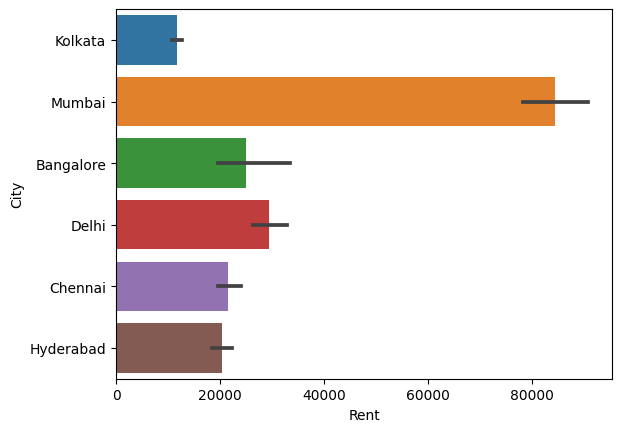

In [14]:
sns.barplot(data=df , x='Rent' , y='City')

<Axes: xlabel='Bathroom', ylabel='count'>

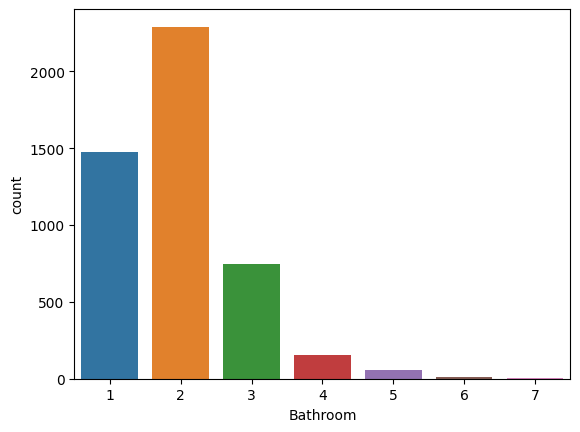

In [15]:
sns.countplot(data=df, x='Bathroom' )

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px

In [17]:
fig = px.pie(df, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

<Axes: xlabel='Area Type', ylabel='count'>

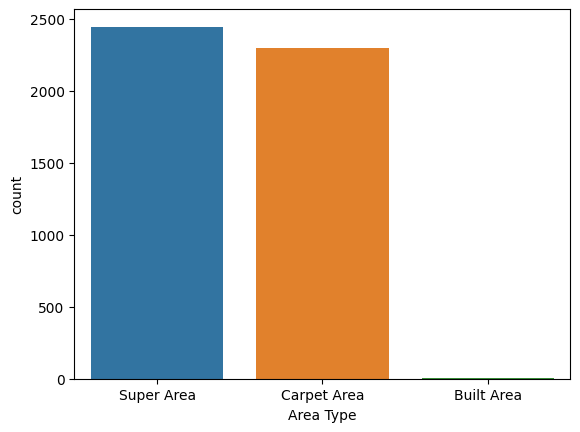

In [18]:
sns.countplot(data=df, x='Area Type' )

<Axes: xlabel='Furnishing Status', ylabel='Rent'>

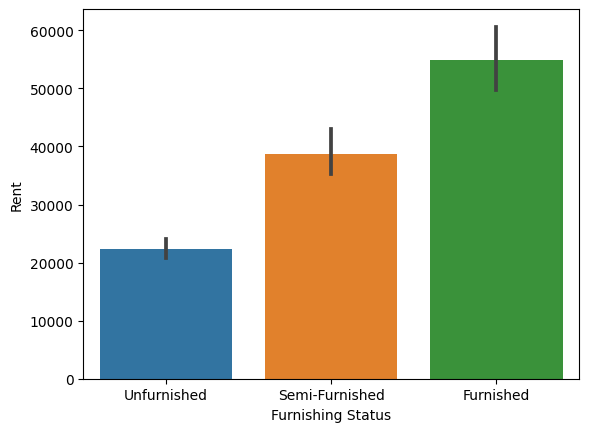

In [19]:
sns.barplot(data=df , x='Furnishing Status' , y='Rent')

<Axes: xlabel='Tenant Preferred', ylabel='Rent'>

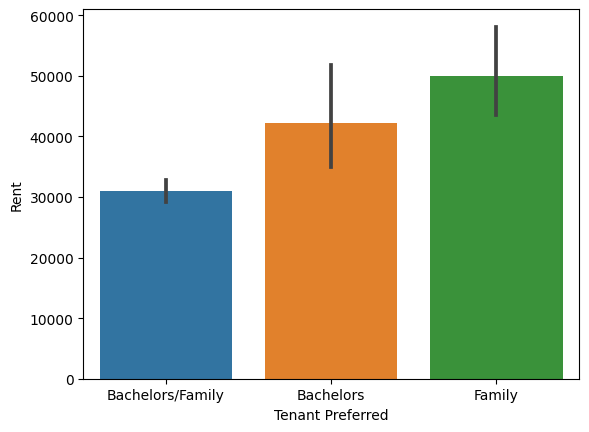

In [20]:
sns.barplot(data=df , x='Tenant Preferred' ,y='Rent')

In [21]:
df['Rent']=(df['Rent']-df['Rent'].min())/(df['Rent'].max()-df['Rent'].min())
df['Size']=(df['Size']-df['Size'].min())/(df['Size'].max()-df['Size'].min())

<Axes: xlabel='Rent', ylabel='Size'>

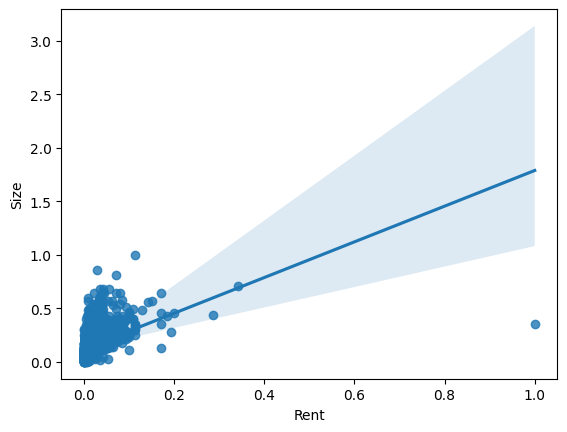

In [22]:
sns.regplot(data=df , x='Rent', y='Size')

In [23]:
df=df.drop('Point of Contact' ,axis=1)
df=df.drop('Floor' , axis=1)
df=df.drop('Area Locality' , axis=1)
df.head()

,Posted On,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2022-05-18,2,0.002515,0.155937,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2022-05-13,2,0.005373,0.113019,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2022-05-16,2,0.004516,0.141631,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2022-07-04,2,0.002515,0.113019,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2022-05-09,2,0.001801,0.120172,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [24]:
df1 = pd.get_dummies(df['Area Type'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('Area Type', axis=1, inplace=True)
df.head()

,Posted On,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom,Built Area,Carpet Area,Super Area
0,2022-05-18,2,0.002515,0.155937,Kolkata,Unfurnished,Bachelors/Family,2,False,False,True
1,2022-05-13,2,0.005373,0.113019,Kolkata,Semi-Furnished,Bachelors/Family,1,False,False,True
2,2022-05-16,2,0.004516,0.141631,Kolkata,Semi-Furnished,Bachelors/Family,1,False,False,True
3,2022-07-04,2,0.002515,0.113019,Kolkata,Unfurnished,Bachelors/Family,1,False,False,True
4,2022-05-09,2,0.001801,0.120172,Kolkata,Unfurnished,Bachelors,1,False,True,False


In [25]:
df['Built Area'] = df['Built Area'].astype(int)
df['Carpet Area'] =df['Carpet Area'].astype(int)
df['Super Area'] = df['Super Area'].astype(int)
df

,Posted On,BHK,Rent,Size,City,Furnishing Status,Tenant Preferred,Bathroom,Built Area,Carpet Area,Super Area
0,2022-05-18,2,0.002515,0.155937,Kolkata,Unfurnished,Bachelors/Family,2,0,0,1
1,2022-05-13,2,0.005373,0.113019,Kolkata,Semi-Furnished,Bachelors/Family,1,0,0,1
2,2022-05-16,2,0.004516,0.141631,Kolkata,Semi-Furnished,Bachelors/Family,1,0,0,1
3,2022-07-04,2,0.002515,0.113019,Kolkata,Unfurnished,Bachelors/Family,1,0,0,1
4,2022-05-09,2,0.001801,0.120172,Kolkata,Unfurnished,Bachelors,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,0.003944,0.141631,Hyderabad,Semi-Furnished,Bachelors/Family,2,0,1,0
4742,2022-05-15,3,0.007946,0.284692,Hyderabad,Semi-Furnished,Bachelors/Family,3,0,0,1
4743,2022-07-10,3,0.009660,0.248927,Hyderabad,Semi-Furnished,Bachelors/Family,3,0,1,0
4744,2022-07-06,3,0.012519,0.213162,Hyderabad,Semi-Furnished,Family,2,0,1,0


In [26]:
df1 = pd.get_dummies(df['Furnishing Status'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('Furnishing Status', axis=1, inplace=True)
df

,Posted On,BHK,Rent,Size,City,Tenant Preferred,Bathroom,Built Area,Carpet Area,Super Area,Furnished,Semi-Furnished,Unfurnished
0,2022-05-18,2,0.002515,0.155937,Kolkata,Bachelors/Family,2,0,0,1,False,False,True
1,2022-05-13,2,0.005373,0.113019,Kolkata,Bachelors/Family,1,0,0,1,False,True,False
2,2022-05-16,2,0.004516,0.141631,Kolkata,Bachelors/Family,1,0,0,1,False,True,False
3,2022-07-04,2,0.002515,0.113019,Kolkata,Bachelors/Family,1,0,0,1,False,False,True
4,2022-05-09,2,0.001801,0.120172,Kolkata,Bachelors,1,0,1,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,0.003944,0.141631,Hyderabad,Bachelors/Family,2,0,1,0,False,True,False
4742,2022-05-15,3,0.007946,0.284692,Hyderabad,Bachelors/Family,3,0,0,1,False,True,False
4743,2022-07-10,3,0.009660,0.248927,Hyderabad,Bachelors/Family,3,0,1,0,False,True,False
4744,2022-07-06,3,0.012519,0.213162,Hyderabad,Family,2,0,1,0,False,True,False


In [27]:
df['Furnished'] = df['Furnished'].astype(int)
df['Semi-Furnished'] =df['Semi-Furnished'].astype(int)
df['Unfurnished'] = df['Unfurnished'].astype(int)
df

,Posted On,BHK,Rent,Size,City,Tenant Preferred,Bathroom,Built Area,Carpet Area,Super Area,Furnished,Semi-Furnished,Unfurnished
0,2022-05-18,2,0.002515,0.155937,Kolkata,Bachelors/Family,2,0,0,1,0,0,1
1,2022-05-13,2,0.005373,0.113019,Kolkata,Bachelors/Family,1,0,0,1,0,1,0
2,2022-05-16,2,0.004516,0.141631,Kolkata,Bachelors/Family,1,0,0,1,0,1,0
3,2022-07-04,2,0.002515,0.113019,Kolkata,Bachelors/Family,1,0,0,1,0,0,1
4,2022-05-09,2,0.001801,0.120172,Kolkata,Bachelors,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,0.003944,0.141631,Hyderabad,Bachelors/Family,2,0,1,0,0,1,0
4742,2022-05-15,3,0.007946,0.284692,Hyderabad,Bachelors/Family,3,0,0,1,0,1,0
4743,2022-07-10,3,0.009660,0.248927,Hyderabad,Bachelors/Family,3,0,1,0,0,1,0
4744,2022-07-06,3,0.012519,0.213162,Hyderabad,Family,2,0,1,0,0,1,0


In [28]:
df1 = pd.get_dummies(df['Tenant Preferred'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('Tenant Preferred', axis=1, inplace=True)
df['Family'] = df['Family'].astype(int)
df['Bachelors/Family'] =df['Bachelors/Family'].astype(int)
df['Bachelors'] = df['Bachelors'].astype(int)
df

,Posted On,BHK,Rent,Size,City,Bathroom,Built Area,Carpet Area,Super Area,Furnished,Semi-Furnished,Unfurnished,Bachelors,Bachelors/Family,Family
0,2022-05-18,2,0.002515,0.155937,Kolkata,2,0,0,1,0,0,1,0,1,0
1,2022-05-13,2,0.005373,0.113019,Kolkata,1,0,0,1,0,1,0,0,1,0
2,2022-05-16,2,0.004516,0.141631,Kolkata,1,0,0,1,0,1,0,0,1,0
3,2022-07-04,2,0.002515,0.113019,Kolkata,1,0,0,1,0,0,1,0,1,0
4,2022-05-09,2,0.001801,0.120172,Kolkata,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,0.003944,0.141631,Hyderabad,2,0,1,0,0,1,0,0,1,0
4742,2022-05-15,3,0.007946,0.284692,Hyderabad,3,0,0,1,0,1,0,0,1,0
4743,2022-07-10,3,0.009660,0.248927,Hyderabad,3,0,1,0,0,1,0,0,1,0
4744,2022-07-06,3,0.012519,0.213162,Hyderabad,2,0,1,0,0,1,0,0,0,1


In [29]:
df['City'].value_counts()

City
Mumbai       971
Chennai      891
Bangalore    886
Hyderabad    867
Delhi        605
Kolkata      524
Name: count, dtype: int64

In [30]:
df1 = pd.get_dummies(df['City'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('City', axis=1, inplace=True)
df['Mumbai'] = df['Mumbai'].astype(int)
df['Chennai'] =df['Chennai'].astype(int)
df['Bangalore'] = df['Bangalore'].astype(int)
df['Hyderabad'] = df['Hyderabad'].astype(int)
df['Delhi']= df['Delhi'].astype(int)
df['Kolkata'] = df['Kolkata'].astype(int)
df

,Posted On,BHK,Rent,Size,Bathroom,Built Area,Carpet Area,Super Area,Furnished,Semi-Furnished,Unfurnished,Bachelors,Bachelors/Family,Family,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2022-05-18,2,0.002515,0.155937,2,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
1,2022-05-13,2,0.005373,0.113019,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,2022-05-16,2,0.004516,0.141631,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,2022-07-04,2,0.002515,0.113019,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
4,2022-05-09,2,0.001801,0.120172,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,0.003944,0.141631,2,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4742,2022-05-15,3,0.007946,0.284692,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4743,2022-07-10,3,0.009660,0.248927,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4744,2022-07-06,3,0.012519,0.213162,2,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [31]:
df.drop(columns='Posted On' , axis =1 , inplace = True)
df


,BHK,Rent,Size,Bathroom,Built Area,Carpet Area,Super Area,Furnished,Semi-Furnished,Unfurnished,Bachelors,Bachelors/Family,Family,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,2,0.002515,0.155937,2,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
1,2,0.005373,0.113019,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,2,0.004516,0.141631,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,2,0.002515,0.113019,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
4,2,0.001801,0.120172,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,0.003944,0.141631,2,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4742,3,0.007946,0.284692,3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4743,3,0.009660,0.248927,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4744,3,0.012519,0.213162,2,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [32]:
df['BHK']=(df['BHK']-df['BHK'].min())/(df['BHK'].max()-df['BHK'].min())
df['Bathroom']=(df['Bathroom']-df['Bathroom'].min())/(df['Bathroom'].max()-df['Bathroom'].min())

In [33]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

In [34]:
X=df.drop(columns='Rent',axis=1,inplace=False) 
y=df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=16)

In [35]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")

print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")

X Shape: (3795, 18), X Type:<class 'pandas.core.frame.DataFrame'>)
y Shape: (3795,), y Type:<class 'pandas.core.series.Series'>)


In [36]:
Weight =np.random.randn(X_train.shape[1])*0.01
Bias = 0
Weight.shape

(18,)

In [37]:
def compute_cost(X,y,W,b):
    m=X.shape[1]
    cost = 0.0
    for i in range(m):
        yhat = np.dot(X.iloc[i],W) + b
        cost = cost + (np.sum(y.iloc[i] - yhat)**2)
    cost = cost / (2*m)
    return cost 

In [38]:
cost =compute_cost(X_train,y_train,Weight,Bias)

In [39]:
cost

0.00025964944691175764